<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modelling-Solar-Cells" data-toc-modified-id="Modelling-Solar-Cells-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modelling Solar Cells</a></span><ul class="toc-item"><li><span><a href="#Equivalent-Circuit" data-toc-modified-id="Equivalent-Circuit-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Equivalent Circuit</a></span></li><li><span><a href="#Classical-Analytical-Expressions" data-toc-modified-id="Classical-Analytical-Expressions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Classical Analytical Expressions</a></span></li><li><span><a href="#Numerical-Drift-Diffusion-Models" data-toc-modified-id="Numerical-Drift-Diffusion-Models-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Numerical Drift-Diffusion Models</a></span><ul class="toc-item"><li><span><a href="#Drift-Diffusion-Equations" data-toc-modified-id="Drift-Diffusion-Equations-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Drift Diffusion Equations</a></span><ul class="toc-item"><li><span><a href="#Steady-State-Solution" data-toc-modified-id="Steady-State-Solution-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Steady State Solution</a></span></li><li><span><a href="#Absolute-zero-Solutions-($T-=-0K$)" data-toc-modified-id="Absolute-zero-Solutions-($T-=-0K$)-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Absolute zero Solutions ($T = 0K$)</a></span></li><li><span><a href="#High-Temperature-Solution" data-toc-modified-id="High-Temperature-Solution-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>High Temperature Solution</a></span></li><li><span><a href="#Constant-Force-n(x)" data-toc-modified-id="Constant-Force-n(x)-1.3.1.4"><span class="toc-item-num">1.3.1.4&nbsp;&nbsp;</span>Constant Force n(x)</a></span></li><li><span><a href="#Constant-Force-p(x)" data-toc-modified-id="Constant-Force-p(x)-1.3.1.5"><span class="toc-item-num">1.3.1.5&nbsp;&nbsp;</span>Constant Force p(x)</a></span></li><li><span><a href="#Coupled-Solution-With-Non-Constant-Force" data-toc-modified-id="Coupled-Solution-With-Non-Constant-Force-1.3.1.6"><span class="toc-item-num">1.3.1.6&nbsp;&nbsp;</span>Coupled Solution With Non Constant Force</a></span></li><li><span><a href="#Drift-Diffusion-with-Energy-as-2nd-Dimension" data-toc-modified-id="Drift-Diffusion-with-Energy-as-2nd-Dimension-1.3.1.7"><span class="toc-item-num">1.3.1.7&nbsp;&nbsp;</span>Drift Diffusion with Energy as 2nd Dimension</a></span></li></ul></li></ul></li><li><span><a href="#Numerical-Gaussian-Disorder-Models" data-toc-modified-id="Numerical-Gaussian-Disorder-Models-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Numerical Gaussian Disorder Models</a></span><ul class="toc-item"><li><span><a href="#1D-GDM-(Energy-and-x_pos)" data-toc-modified-id="1D-GDM-(Energy-and-x_pos)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>1D GDM (Energy and x_pos)</a></span></li></ul></li><li><span><a href="#Monte-Carlo-Simulations" data-toc-modified-id="Monte-Carlo-Simulations-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Monte Carlo Simulations</a></span></li><li><span><a href="#Quantum-Mechanical/Chemical-Calculations" data-toc-modified-id="Quantum-Mechanical/Chemical-Calculations-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Quantum Mechanical/Chemical Calculations</a></span></li></ul></li></ul></div>

# Modelling Solar Cells

In [1]:
%matplotlib notebook
# For matplotlib animations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
import Grid as GridClass
GridS = GridClass.GridS
GridD = GridClass.GridD

In [4]:
import ipyvolume as ipv  # Does not come with default anaconda #Used to show 3D graphs

## Equivalent Circuit

## Classical Analytical Expressions

## Numerical Drift-Diffusion Models

### Drift Diffusion Equations
Take as 1 Dimension

> \begin{align*}
  \frac{\partial n}{\partial t} &= G_n - R_n + \frac{1}{q}\frac{\partial J_n}{\partial x} \\
\ \frac{\partial p}{\partial t} &= G_p - R_p - \frac{1}{q}\frac{\partial J_p}{\partial x} \\
\ J_n &= qu_nFn + qD_n \frac{\partial n}{\partial x}\\
\ J_p &= qu_pFp - qD_p \frac{\partial p}{\partial x}\\
\ \frac{\partial F}{\partial x} &= \frac{q}{\epsilon_0 \epsilon_r}(p-n+c)
\end{align*}

With $u_n = qD_n\beta$, $u_p = qD_p\beta$ with $\beta = \frac{1}{k_bT}$, with $q$ being the fundamental charge.


If wanted we could include the last equation (4.22), but it is negligible. Only take into account when building Dyson Spheres around stars larger than ours. 

#### Steady State Solution


We can set $\frac{\partial n}{\partial t}=\frac{\partial p}{\partial t}=0$ to get a steady state solution, this gives us a coupled ODE which should be easy to solve.

> \begin{align*}
  \frac{dJ_n}{dx} &= q(R_n - G_n)\\
\ \frac{dJ_p}{dx} &= q(G_p - R_p)\\
\ \frac{dn}{dx} &= \frac{J_n-qu_nFn}{qD_n}\\
\ \frac{dp}{dx} &= \frac{qu_pFp - J_p}{qD_p}\\
\ \frac{dF}{dx} &= \frac{q}{\epsilon_0 \epsilon_r}(p-n+c)
\end{align*}


Tells us the steady state related to the boundary condition.

We use the fact
> $y_{n+1}=y_n + \frac{dy_n}{dx}dx$

In [5]:
# Constants
T = 1
k_b = 1
B = 1/(T*k_b)
q = 1
G_p, R_p = 2, 0
G_n, R_n = 2, 0
D_n, D_p = 1, 1
u_n = q*D_n*B
u_p = q*D_p*B
A = 1
C = 1


dx = 0.001
x_f = 1
N = int((x_f)//dx) + 1

# Could put in 2D grid but easier to read like this
J_n_ = np.zeros(N)
J_p_ = np.zeros(N)
n_ = np.zeros(N)
p_ = np.zeros(N)
F_ = np.zeros(N)

# Initial conditions at x_0
p_[0] = 0
n_[0] = 0
F_[0] = 3
J_n_[0]= 1.4380931547599094*D_n*q
J_p_[0]= -0.55404*D_p*q


def Calc_Next(J_n, J_p, n, p, F):
    # n prefix stands for new value
    nJ_n = J_n + (q*(R_n-G_n))*dx
    nJ_p = J_p + (q*(G_p-R_p))*dx
    nn = n + ((J_n - q*u_n*F*n)/(q*D_n))*dx
    n_p = p + ((-J_p + q*u_p*F*p)/(q*D_p))*dx  # We need np extension
    nF = F #+ A*(p-n+C)*dx
    return nJ_n, nJ_p, nn, n_p, nF


for i in range(N-1):
    J_n_[i+1], J_p_[i+1], n_[i+1], p_[i+1], F_[i +
                                               1] = Calc_Next(J_n_[i], J_p_[i], n_[i], p_[i], F_[i])

<IPython.core.display.Javascript object>


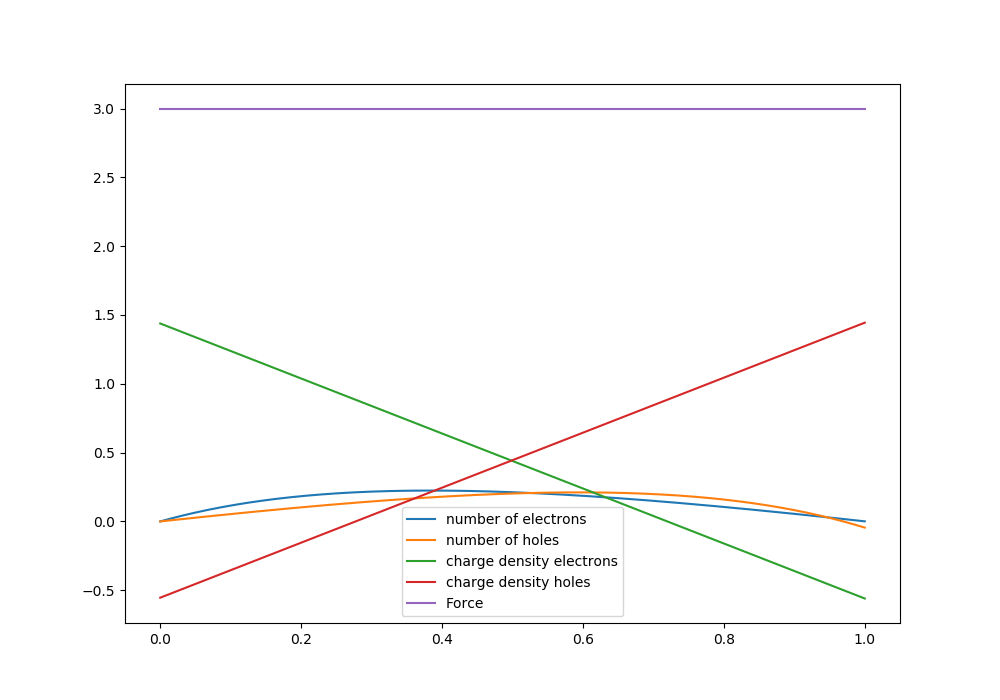

In [6]:
x = np.linspace(0, x_f, N)
plt.figure(figsize=(10, 7))
plt.plot(x, n_, label="number of electrons")
plt.plot(x, p_, label="number of holes")
plt.plot(x, J_n_, label="charge density electrons")
plt.plot(x, J_p_, label="charge density holes")
plt.plot(x, F_, label="Force")
plt.legend()
plt.show()

Therefore, the ODE steady state method does work as when F is constant and when we set the correct initial conditions we get the same solution as below.

#### Absolute zero Solutions ($T = 0K$)

#### High Temperature Solution

#### Constant Force n(x)
When the force is constant, the p and n equations do not depend on each other. We will look at n.

> $\frac{\partial n}{\partial t} = G_n - R_n + u_nF\frac{\partial n}{\partial x} + D_n \frac{\partial^2n}{\partial x^2}$

$G_n - R_n$ is a concentration of electrons source, 

> $n_N = n_O + \delta t(G_n - R_n + \frac{u_nF}{2h}(n_E - n_W) + \frac{D_n}{h^2}(n_E - 2n_O + n_W))$

In [7]:
# Constants
T = 1
k_b = 1
B = 1/(T*k_b)
q = 1
G_n, R_n = 2, 0
D_n = 1
u_n = q*D_n*B
F = 3

dx = 0.05
x_f = 1
N_x = int((x_f)/dx) + 1
dt = 0.001
T = 2
N_t = int((T)/dt) + 1

Grid = np.zeros([N_t, N_x])

# BC's
# zero do nothing
# Grid[:,0] = np.zeros(len(Grid))+10. #Run if we want a cluster of electrons at the positive node

# IC
#n_0 = np.array([i*dx for i in range(0,N_x)])
Grid[len(Grid)-1] = np.zeros(len(Grid[0]))+0.4



Grid = GridS(Grid)
n_ = Grid.u_


def new_n_(i, j):
    j -= 1
    temp = G_n - R_n + ((u_n*F)/(2*0.05))*(n_(i+1, j) - n_(i-1, j)) + \
        ((D_n)/(0.05**2))*(n_(i+1, j)-2*n_(i, j)+n_(i-1, j))
    temp *= dt
    return n_(i, j) + temp


for j in range(1, N_t):
    for i in range(1, N_x-1):
        Grid.Set_u_(i, j, new_n_(i, j))

In [8]:
np.max(Grid.Grid[0])

0.2239453283460387

In [9]:
a = np.arange(0.0, x_f+0.00001, dx)
b = np.arange(0.0, T+0.00001, dt)
U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
Z = Grid.Grid

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

Electrons travel in opposite direction of force as they are negatively charged. Force is the direction away from the positive electrode. Since $F>0$ positive node at $x=0$. And the electrons want to be next to the positive node. But why is there zero at the positive node? (No it was because the is what we set our BC's) to be Maybe as soon as it touches the positive electrode the electron get taken into the circuit. (Only have a curve as we have a positive generation rate)

##### Analytic Solution, for n(x)
To Prove Steady State is correct, we will solve

> $D_n \frac{\partial^2n}{\partial x^2} + u_nF\frac{\partial n}{\partial x} = R_n - G_n$

Very simple ODE with BC's $0$. Solved solution is

> $n(x) = \frac{R_n-G_n}{u_nF}[x - \frac{exp(-\frac{u_nF}{D_n}x) - 1}{exp(-\frac{u_nF}{D_n}) - 1}]$




In [10]:
def n(x):
    temp = np.exp(-x*(u_n*F)/(D_n)) - 1
    temp /= np.exp(-(u_n*F)/(D_n)) - 1
    temp = x - temp
    temp /= u_n*F
    return (R_n - G_n)*temp


def grad_n(x):
    # Could also calculate analytically
    d = 0.00000001
    return (n(x+d)-n(x))/d


#Now calculate Current desity J_n
def J_n(x):
    return q*u_n*F*n(x)+q*D_n*grad_n(x)

In [11]:
#Now calculate Current desity J_n

<IPython.core.display.Javascript object>


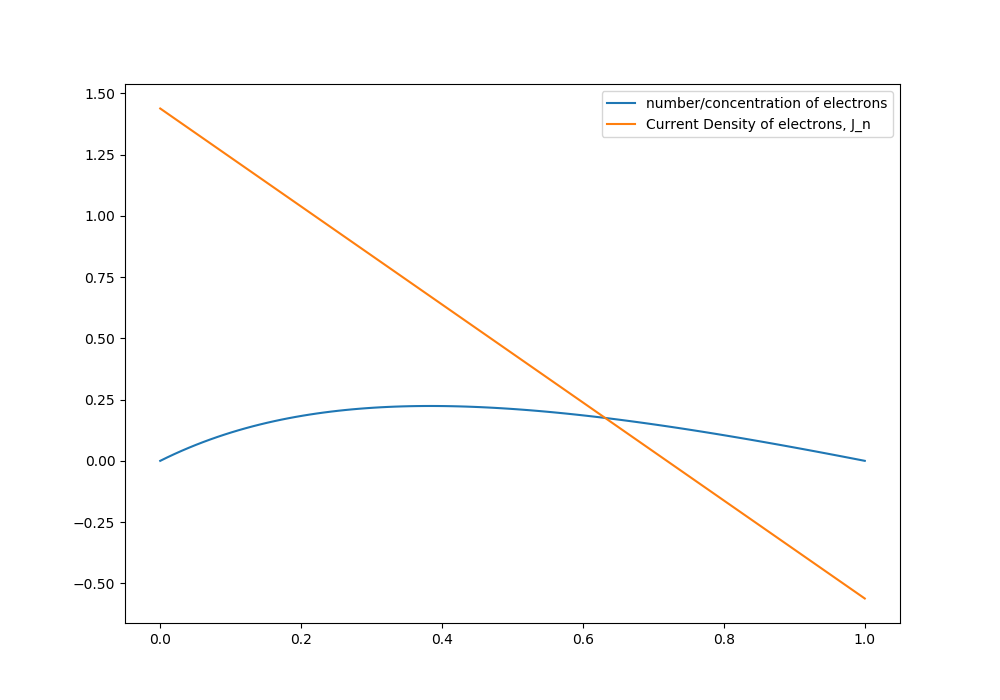

In [12]:
x = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 7))
plt.plot(x, n(x), label="number/concentration of electrons")
plt.plot(x, J_n(x), label="Current Density of electrons, J_n")
plt.legend()
plt.show()

The steady state is the same !! :)

#### Constant Force p(x)
When the force is constant, the p and n equations do not depend on each other. We will look at p.

> $\frac{\partial p}{\partial t} = G_p - R_p - u_pF\frac{\partial p}{\partial x} + D_p \frac{\partial^2p}{\partial x^2}$

$G_p - R_p$ is a concentration of electrons source, 

> $p_N = p_O + \delta t(G_p - R_p - \frac{u_pF}{2h}(p_E - p_W) + \frac{D_p}{h^2}(p_E - 2p_O + p_W))$

In [13]:
G_p, R_p = 2, 0
D_p = 1
u_p = q*D_p*B

Grid = np.zeros([N_t, N_x])

Grid = GridS(Grid)
p_ = Grid.u_

def new_p_(i, j):
    j -= 1
    temp = G_p - R_p - ((u_p*F)/(2*0.05))*(p_(i+1, j) - p_(i-1, j)) + \
        ((D_p)/(0.05**2))*(p_(i+1, j)-2*p_(i, j)+p_(i-1, j))
    temp *= dt
    return p_(i, j) + temp


for j in range(1, N_t):
    for i in range(1, N_x-1):
        Grid.Set_u_(i, j, new_p_(i, j))


In [14]:
a = np.arange(0.0, x_f+0.00001, dx)
b = np.arange(0.0, T+0.00001, dt)
U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
Z = Grid.Grid

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

#### Coupled Solution With Non Constant Force

We rearrange the drift diffusion equations, and remember that $p, n, F$ depend on $x,t$

> \begin{align*}
  \frac{\partial n}{\partial t} &= G_n - R_n + D_n \frac{\partial^2n}{\partial x^2}
\ + u_nF\frac{\partial n}{\partial x} + u_nnA(p-n+c) \\
\ \frac{\partial p}{\partial t} &= G_p - R_p + D_p \frac{\partial^2p}{\partial x^2}
\ - u_pF\frac{\partial p}{\partial x} - u_ppA(p-n+c) \\
\ F(s,t) &= F(s_0,t) + Ac(s-s_0) + A\int_{s_0}^{s}(p-n)dx  
\end{align*}

Where $A=\frac{q}{\epsilon_0\epsilon_r}$, the last part comes from the fact

> \begin{align*}
 \ \frac{\partial F(x,t)}{\partial x} &= A(p-n+c) \\
 \ \int_{F(s_0,t)}^{F(s,t)}1\partial F &= \int_{s_0}^{s} A(p-n+c)\partial x\\
 \ F(s,t) &= F(s_0,t) + Ac(s-s_0) + A\int_{s_0}^{s}(p-n)dx \\
\end{align*}


Discretise the equations.
> \begin{align*}
  n_{i,j+1} &= n_{i,j} + \delta t \left( G_n - R_n + \frac{D_n}{h^2}(n_{i+1,j}-2n_{i,j}+n_{i-1,j})
\ + \frac{u_nF_{i,j}}{2h}(n_{i+1,j}-n_{i-1,j}) + u_nn_{i,j}A(p_{i,j}-n_{i,j}+c)\right) \\
\ p_{i,j+1} &= p_{i,j} +\delta t\left( G_p - R_p +  \frac{D_p}{h^2}(p_{i+1,j}-2p_{i,j}+p_{i-1,j})
\ - \frac{u_pF_{i,j}}{2h}(p_{i+1,j}-p_{i-1,j}) - u_pp_{i,j}A(p_{i,j}-n_{i,j}+c) \right) \\
\ F_{i,j} &= F_{i_0,j} + Ach(i-i_0) + A\sum_{k=i_0}^{i}(p_{k,j}-n_{k,j}) 
\end{align*}

For here we will take $i_0=0$

In [15]:
i_0 = 0 #Has to be zero due to for loop, can be changed
#Constants
T = 1
k_b = 1
B = 1/(T*k_b)
q = 1
G_p, R_p = 2, 0
G_n, R_n = 2, 0
D_n, D_p = 1, 1
u_n = q*D_n*B
u_p = q*D_p*B
A = 1
C = 1



h = 0.05 #dx
x_f = 1

dt = 0.0005
t_f = 1

Num_x = int((x_f)//h) + 1
Num_t = int((t_f)//dt) + 1

# Create Grids
Grid_n = np.zeros([Num_t,Num_x])
Grid_p = np.zeros([Num_t,Num_x])
Grid_F = np.zeros([Num_t,Num_x])

#Initial (IC's)
Grid_n[-1] = np.ones([Num_x])
Grid_p[-1] = np.ones([Num_x])
Grid_F[-1] = np.ones([Num_x])*3


# BC's
Grid_F[:,0] = np.ones([Num_t])*3
#Grid_F[:,-1]

Grid_n = GridS(Grid_n)
Grid_p = GridS(Grid_p)
Grid_F = GridS(Grid_F)

n_ = Grid_n.u_
p_ = Grid_p.u_
F_ = Grid_F.u_


def new_n_(i,j):
    j -= 1
    
    partA = G_n - R_n
    partB = n_(i+1,j)-2*n_(i,j)+n_(i-1,j)
    partB *= (D_n)/(h**2)
    partC = n_(i+1,j)-n_(i-1,j)
    partC *= (u_n*F_(i,j))/(2*h)
    partD = p_(i,j)-n_(i,j)+C
    partD *= u_n*n_(i,j)*A
    return n_(i,j) + dt*(partA + partB + partC + partD)
    
    
def new_p_(i,j):
    j -= 1
    
    partA = G_n - R_n
    partB = p_(i+1,j)-2*p_(i,j)+p_(i-1,j)
    partB *= (D_p)/(h**2)
    partC = p_(i+1,j)-p_(i-1,j)
    partC *= (u_p*F_(i,j))/(2*h)
    partD = p_(i,j)-n_(i,j)+C
    partD *= u_p*p_(i,j)*A
    return p_(i,j) + dt*(partA + partB - partC - partD)
    
def new_F_(i,j):
    temp = 0
    for k in range(i_0,i+1):
        temp += p_(k,j)+n_(k,j)        
    temp *= A
    temp += F_(i_0, j) + A*C*h*(i-i_0) 
    return temp

def solve_n(j):
    #Not left or right boundary
    for i in range(1,Num_x-1):
        Grid_n.Set_u_(i,j,new_n_(i,j))
    
def solve_p(j):
    #Not left or right boundary
    for i in range(1,Num_x-1):
        Grid_p.Set_u_(i,j, new_p_(i,j))
    
def solve_F(j):
    #Not the i_0 element
    for i in range(1,Num_x):        
        Grid_F.Set_u_(i,j,new_F_(i,j))
        
        
for j in range(1, Num_t):
    solve_n(j)
    solve_p(j)
    solve_F(j)


In [16]:
a = np.linspace(0, x_f, num=Num_x, endpoint=True)
b = np.linspace(0, t_f, num=Num_t, endpoint=True)

U, V = np.meshgrid(a, b)
X = U
Y = V  # The y-axis is the wrong way around
Z = Grid_p.Grid

ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()

<IPython.core.display.Javascript object>


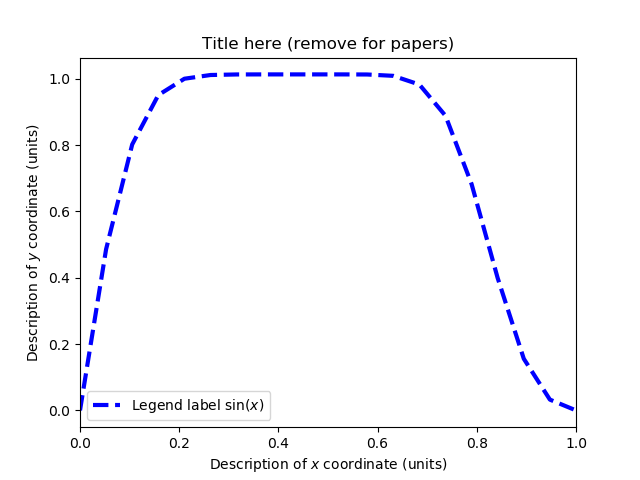

In [17]:
# Silly example data
bp_x = np.linspace(0, 1, num=Num_x, endpoint=True)
bp_y = Grid_n.Grid[-10]

# Make the plot
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 1)

plt.legend(loc="lower left")
plt.show()

<IPython.core.display.Javascript object>


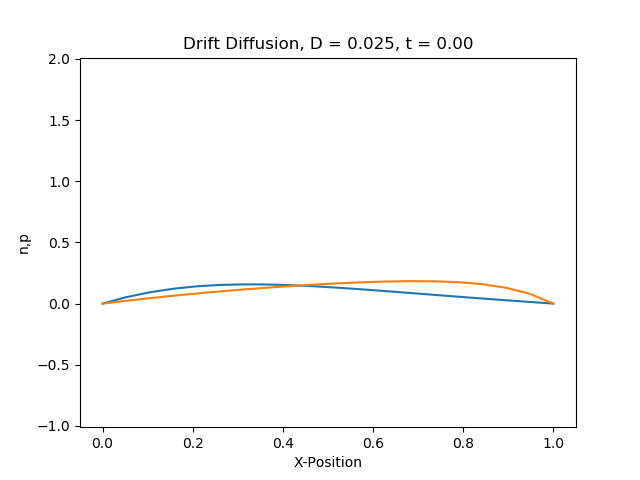

In [18]:
def dataLD(i, y_n,y_p, line_n, line_p):
    t = i*dt
    y_n = Grid_n.Grid[-i]
    y_p = Grid_p.Grid[-i]
    ax.clear()
    ax.set_ylim(-1.01, 2.01)
    ax.set_title('Drift Diffusion, D = 0.025, t = ' + "{:.2f}".format(t))
    line_n = ax.plot(x, y_n)
    line_p = ax.plot(x, y_p)
    ax.set_ylabel('n,p')
    ax.set_xlabel('X-Position')
    #fig.colorbar(line, shrink=0.5, aspect=5)
    return line,


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Drift Diffusion, D = 0.025, t = 0.00')

x = np.linspace(0, 1, num=Num_x, endpoint=True)
y_n = Grid_n.Grid[-1]
y_p = Grid_p.Grid[-1]
line_n = ax.plot(x, y_n)
line_p = ax.plot(x, y_p)
ax.set_ylim(-1.01, 2.01)
ax.set_ylabel('n,p')
ax.set_xlabel('X-Position')

#fig.colorbar(line, shrink=0.5, aspect=10)
ani = animation.FuncAnimation(fig, dataLD, fargs=(
    y_n, y_p, line_n, line_p), frames=np.arange(0, 500), interval=20, blit=True)

plt.show()

<IPython.core.display.Javascript object>


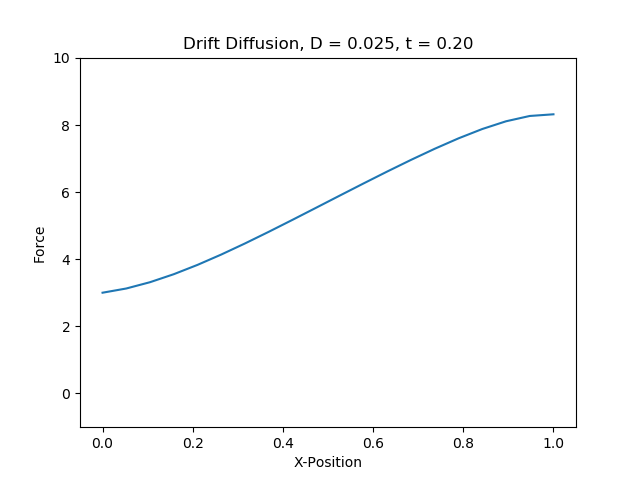

In [19]:
def dataLD(i, line_F):
    t = i*dt
    y_F = Grid_F.Grid[-i]

    ax.clear()
    ax.set_ylim(-1.01, 10.01)
    ax.set_title('Drift Diffusion, D = 0.025, t = ' + "{:.2f}".format(t))
    line_F = ax.plot(x, y_F)

    ax.set_ylabel('Force')
    ax.set_xlabel('X-Position')
    #fig.colorbar(line, shrink=0.5, aspect=5)
    return line_F,


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Drift Diffusion, D = 0.025, t = 0.00')

x = np.linspace(0, 1, num=Num_x, endpoint=True)
y_F = Grid_F.Grid[-1]

line_F = ax.plot(x, y_F)

ax.set_ylim(-1.01, 10.01)
ax.set_ylabel('Force')
ax.set_xlabel('X-Position')

#fig.colorbar(line, shrink=0.5, aspect=10)
ani = animation.FuncAnimation(fig, dataLD, fargs=(line_F), frames=np.arange(0, 500), interval=20, blit=True)

plt.show()

#### Drift Diffusion with Energy as 2nd Dimension

We have the equations, which include energy

> \begin{align*}
  \frac{\partial \tilde{n}}{\partial t} &= \frac{v_0}{\sqrt{2\pi}\tilde{\sigma}}\exp(-\frac{1}{2\tilde{\sigma}^2}(\epsilon - E_c - \lambda)^2)
\ \left( \tilde{K}(-\frac{\beta g_1(x)}{2} \frac{\partial \phi}{\partial x}+\frac{\partial g_1(x)}{\partial x})
\ \frac{\partial \tilde{n}}{\partial x} + \frac{\tilde{K} g_1(x)}{2} \frac{\partial^2 \tilde{n}}{\partial x^2}
\ + Cg_1(x)\bar{E}_n\frac{\partial \tilde{n}}{\partial \epsilon} \right) \\
\ \frac{\partial \tilde{p}}{\partial t} &= \frac{v_0}{\sqrt{2\pi}\tilde{\sigma}}\exp(-\frac{1}{2\tilde{\sigma}^2}(\epsilon - E_c + \lambda)^2)
\ \left( \tilde{K}(\frac{\beta g_1(x)}{2} \frac{\partial \phi}{\partial x}+\frac{\partial g_1(x)}{\partial x})
\ \frac{\partial \tilde{p}}{\partial x} + \frac{\tilde{K} g_1(x)}{2} \frac{\partial^2 \tilde{p}}{\partial x^2}
\ + Cg_1(x)\bar{E}_p\frac{\partial \tilde{p}}{\partial \epsilon} \right) \\
\ \frac{\partial \phi}{\partial x} \rvert_{x=s} &= \frac{\partial \phi}{\partial x} \rvert_{x=0} + A\int_{0}^{s}(\tilde{p}-\tilde{n})dx  
\end{align*}


Key
> \begin{align*}
  \tilde{n}(x, \epsilon, t) &= \tilde{n}_O \\
\ \tilde{n}(x + \delta x, \epsilon, t) &= \tilde{n}_E \\
\ \tilde{n}(x - \delta x, \epsilon, t) &= \tilde{n}_W \\
\ \tilde{n}(x, \epsilon + \delta \epsilon, t) &= \tilde{n}_N \\
\ \tilde{n}(x, \epsilon - \delta \epsilon, t) &= \tilde{n}_S \\
\ \tilde{n}(x, \epsilon, t + \delta t) &= \tilde{n}_U \\
\ \tilde{n}(x, \epsilon, t - \delta t) &= \tilde{n}_D \\
\end{align*}


By using expansions(Taylor)
Calculate gradient of $g_1$
> $\frac{\partial g_1}{\partial x} = \frac{1}{h}(g_1(x+h)-g_1(x))$


Calculate partial for $\tilde{n}$
> \begin{align*}
  \frac{\partial \tilde{n}}{\partial t} &= \frac{1}{\delta t}(\tilde{n}_U-\tilde{n}_O)
\ \rightarrow \tilde{n}_U = \tilde{n}_O + \delta t \frac{\partial \tilde{n}}{\partial t} \\
  \frac{\partial \tilde{n}}{\partial \epsilon} &= \frac{1}{2 \delta \epsilon}(\tilde{n}_N-\tilde{n}_S)\\
  \frac{\partial \tilde{n}}{\partial x} &= \frac{1}{2 \delta x}(\tilde{n}_E-\tilde{n}_W)\\
  \frac{\partial^2 \tilde{n}}{\partial x^2} &= \frac{1}{(\delta x)^2}(\tilde{n}_E-2\tilde{n}_O+\tilde{n}_W)
\end{align*}

Calculate partial for $\tilde{n}$
> \begin{align*}
  \frac{\partial \tilde{p}}{\partial t} &= \frac{1}{\delta t}(\tilde{p}_U-\tilde{p}_O)
  \ \rightarrow \tilde{p}_U = \tilde{p}_O + \delta t \frac{\partial \tilde{p}}{\partial t} \\
  \frac{\partial \tilde{p}}{\partial \epsilon} &= \frac{1}{2 \delta \epsilon}(\tilde{p}_N-\tilde{p}_S)\\
  \frac{\partial \tilde{p}}{\partial x} &= \frac{1}{2 \delta x}(\tilde{p}_E-\tilde{p}_W)\\
  \frac{\partial^2 \tilde{p}}{\partial x^2} &= \frac{1}{(\delta x)^2}(\tilde{p}_E-2\tilde{p}_O+\tilde{p}_W)
\end{align*}

We sub these into the equation above, we find the value of many constants in the gdm document.

##### Compute On GPU (CUDA)

Compute done on university cluster and output to file which is copied across.

In [20]:
name = "nOutput"
#name = "pOutput"
xDim = 101
yDim = 101

def read_file(filename):
    f = open(filename,"r")
    return np.array(f.read().splitlines()).astype(float)

        

x = np.linspace(0.0,1.0,xDim)
y = np.linspace(0.0,1.0,yDim)

U, V = np.meshgrid(x, y)
X = U
Y = V  # The y-axis is the wrong way around
Z = read_file(name)

''' For single Z
ipv.figure()
ipv.plot_surface(X, Y, Z, color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.show()
'''
#
ipv.figure()
s = ipv.plot_surface(X, Y, Z.reshape(len(Z)//(xDim*yDim),1,-1), color="orange")
#ipv.plot_wireframe(X, Y, Z, color="red")
ipv.animation_control(s, add = True, interval=200)#, sequence_length=2)
ipv.show()

## Numerical Gaussian Disorder Models

### 1D GDM (Energy and x_pos)

In [21]:
def F_Normal(x, u=0, o=1):
    # returns P(N<x|u,o)
    temp = 0
    ds = 0.01
    for s in np.arange(-10,x,ds):
        temp += np.exp(-(s-u)**2/(2*o**2))*ds
    temp /= (2*np.pi*o)**0.5    
    
    #Can include last step, as may be incorrect size
    return temp

In [22]:
E_u, E_o = 5,1
x_u, x_o = 0,1
x_L, x_U = 0,2
x_uniform = True
Num = 200#Number of sites

#Node Positions
Up_Node = 1.9
Low_Node = 0.1 #Outside of this range is where the nodes are (electrons enter/leave to form current)


v_0 = 1
Gamma = 1
k_B = 1
T = 1
beta = 1/(k_B*T)
lam = 1
e = -1
F = 6

def v_1(i,j):
    return v_0*np.exp(-2*Gamma*abs(x[i]-x[j]))


def v_2_mar(i,j): #Marcus jump rates
    #from i to j
    exp = -(beta)/(4*lam)
    exp *= (E[j]-E[i]+lam)**2
    
    temp = (beta/(4*np.pi*lam))**0.5
    temp *= np.exp(exp)
    return temp

def v_2_mil(i,j): #Miller-Abrahms type
    #from i to j
    temp = 1
    if E[j]>E[i]:
        #Force only effects jumps from low energy to high energy
        #Force in direction of hop site  
        temp = np.exp(-(E[j]-E[i]-e*F*(x[j]-x[i]))/(k_B*T))
    return temp


    
def v_(i,j): #Jump Rate
    if i == j:
        return 0    
    return v_1(i,j)*v_2_mil(i,j)


def pick_index(a):
    '''
    input
    -----
    vector(np.array): a
    vector of probs sum up to one
    
    returns
    -------
    returns the index of the element that gets chosen randomly depending on probs in vector
    
    '''
    
    CDF = np.array([sum(a[:n+1]) for n in range(len(a))])
    x = np.random.uniform(low = 0, high = 1, size = 1)
    for index in range(len(a)):
        if x <= CDF[index]:
            return index
    return "Error" 
    
    

In [23]:
E = np.random.normal(loc=E_u, scale=E_o, size=Num)
x = np.random.normal(loc=x_u, scale=x_o, size=Num)
if x_uniform:
    x = np.random.uniform(low=x_L, high=x_U, size=Num)

In [24]:
#?we can simulate the force by changing the values of the energy?

#Calculate Jump Rates
jump_rates = np.array([[v_(i,j) for j in range(Num)] for i in range(Num) ])



#Calculate Jump Probs
jump_probs = np.array([jump_rates[i]/sum(jump_rates[i]) for i in range(Num)])


In [25]:
#Start at E[0], x[0]
#Calculate path
steps = 25
path = np.zeros(steps) #Randomly gen path
path_ML = np.zeros(steps) # Most likely path not random

#IC's start on
path[0] = x.argmax()
path_ML[0] = x.argmax()

#Path Calculated Randomly
for i in range(1,steps):
    path[i] = pick_index(jump_probs[int(path[i-1])])
    
#Path_ML takes most likly path
for i in range(1,steps):
    path_ML[i] = jump_probs[int(path_ML[i-1])].argmax()
    

In [26]:
num_samples = 200

paths = [[np.random.randint(0, len(x))] for path_index in range(num_samples)]
steps = np.zeros(num_samples)
for path_index in range(num_samples):
    step = 0
    while True:
        paths[path_index].append(pick_index(jump_probs[int(paths[path_index][-1])]))
        step += 1
        if x[int(paths[path_index][-1])] < Low_Node:
            steps[path_index] = step
            break
    
print(np.mean(steps))

5.085


<IPython.core.display.Javascript object>


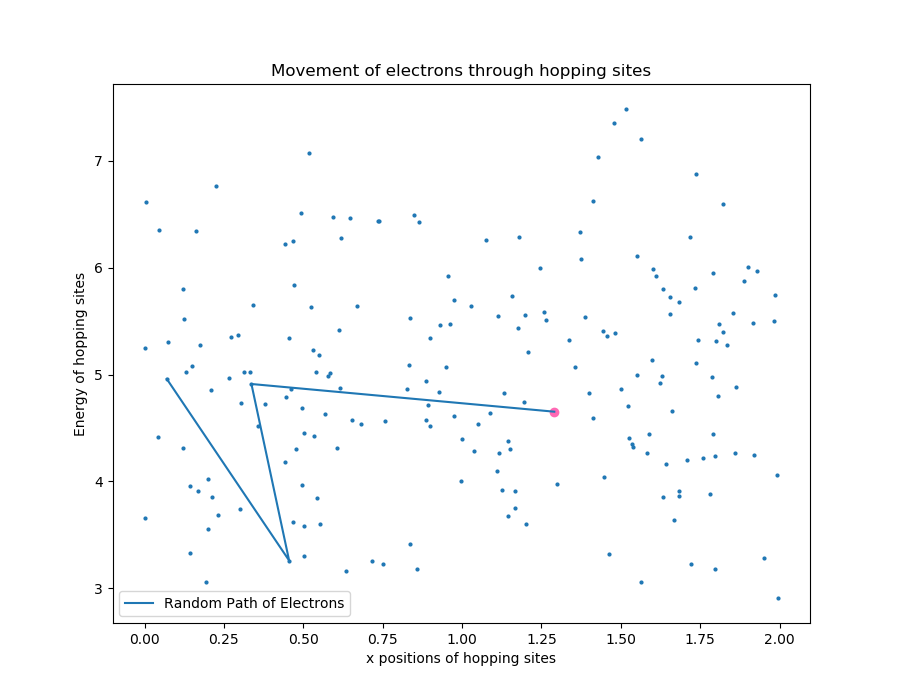

In [27]:
#Plot Grid

plt.figure(figsize=(9, 7))

plt.scatter(x,E, s = 4)
plt.xlabel(r"x positions of hopping sites")
plt.ylabel(r"Energy of hopping sites")
plt.title(r"Movement of electrons through hopping sites")

#Plot random path of electrons
E_path = np.array([E[int(path_val)] for path_val in paths[0]])
x_path = np.array([x[int(path_val)] for path_val in paths[0]])
plt.plot(x_path, E_path, label = "Random Path of Electrons")

'''
#Plot most likly path of electrons
E_path_ML = np.array([E[int(path_val)] for path_val in path_ML])
x_path_ML = np.array([x[int(path_val)] for path_val in path_ML])
plt.plot(x_path_ML, E_path_ML, label = "Most Likely Path Of Electrons")
'''

#Make start of path a different colour (Red = Start)
plt.scatter(x_path[0], E_path[0], color = 'hotpink')


plt.legend(loc="lower left")
plt.show()

## Monte Carlo Simulations

## Quantum Mechanical/Chemical Calculations